# Personal Take on the Fashion MNIST set, to attempt to obtain 95% accuracy on the test set

In [54]:
# Import dependencies

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.initializers import he_normal
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' #This line is necessary on macbook s.t. models compile
import os

plt.style.use('seaborn-colorblind')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [8]:
test_images.shape

(10000, 28, 28)

In [10]:
print(train_labels.shape)
print(test_labels.shape)

(60000,)
(10000,)


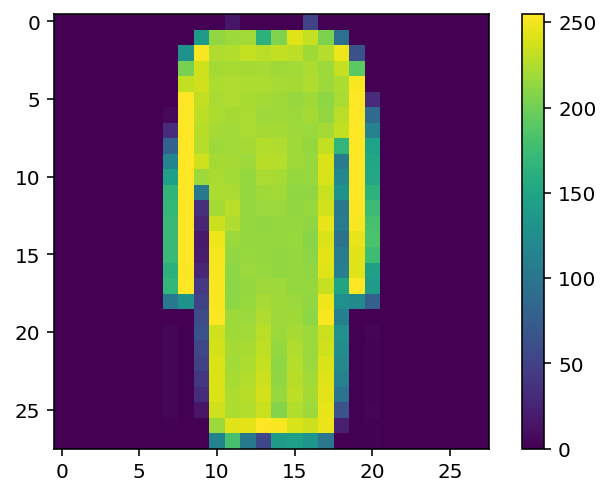

In [16]:
plt.figure()
plt.imshow(train_images[25])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
train_images = train_images / 255.0

test_images = test_images / 255.0

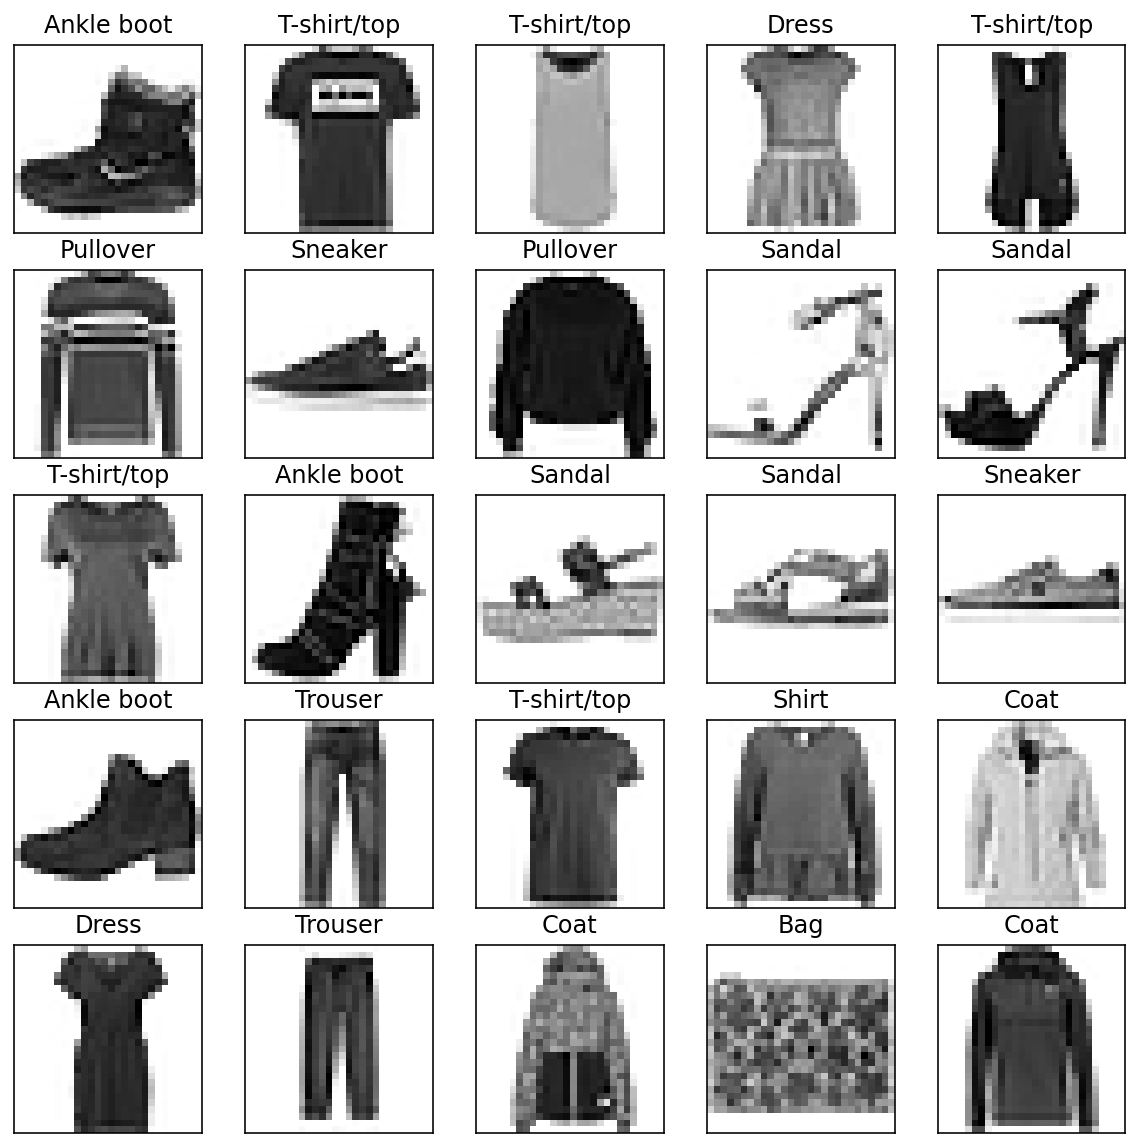

In [31]:
plt.figure(figsize = (10,10))

for i in range(25):
    plt.subplot(5,5, i + 1)
    plt.tick_params(axis='both', which='both', length=0, labelbottom=False, labelleft=False)
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.title(class_names[train_labels[i]])
# plt.show()

# Build initial model

In [35]:
model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(10) # Fully connected output layer
])

In [41]:
learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])

In [43]:
history = model.fit(train_images, train_labels, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3300 - accuracy: 0.8846
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3304 - accuracy: 0.8849
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3260 - accuracy: 0.8844
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3218 - accuracy: 0.8858
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3201 - accuracy: 0.8877
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3191 - accuracy: 0.8875
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3236 - accuracy: 0.8842
Epoch 8/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3264 - accuracy: 0.8862
Epoch 9/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3173 - accuracy: 0.8885
Epoch 10/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.317

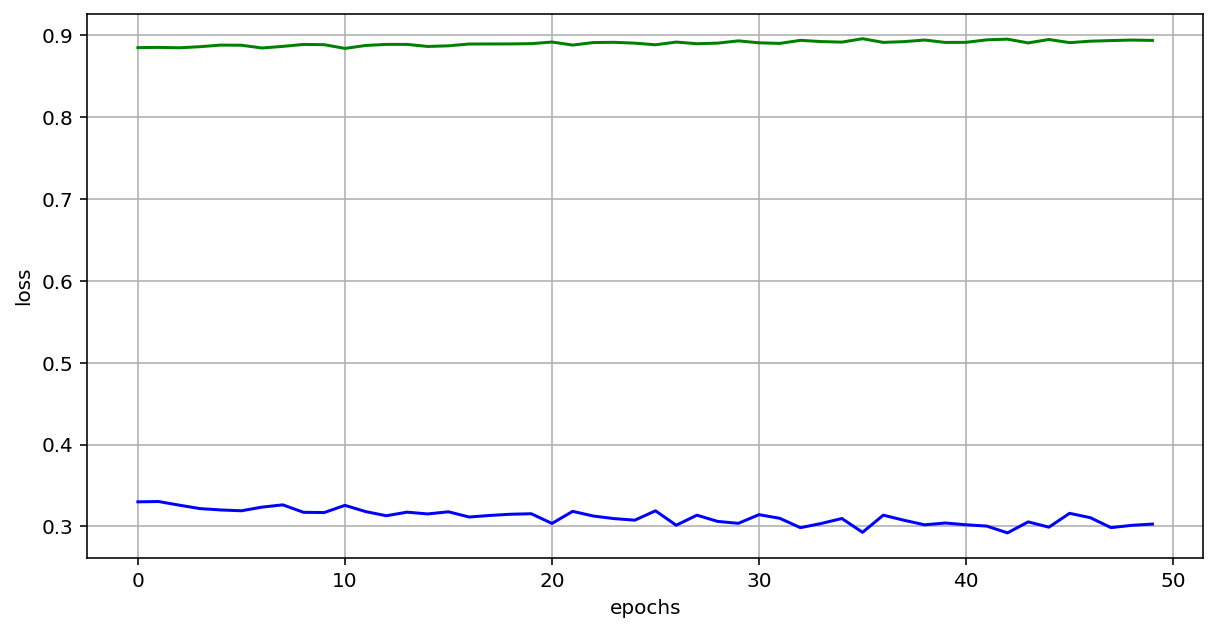

In [45]:
plt.figure(figsize = (10,5))
plt.plot(history.history["loss"], c = 'b')
plt.plot(history.history['accuracy'], c = 'g')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid(True)
plt.show()

Note here that we are not even breaking the 90% accuracy mark

In [47]:
# Let's define a new model, but this time with 3 layers, which includes a 'squeeze' layer.

model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(128, activation = 'relu'),
    Dense(8, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(10) # Fully connected output layer
])

In [48]:
learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])

In [49]:
history = model.fit(train_images, train_labels, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6255 - accuracy: 0.7709
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4963 - accuracy: 0.8256
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4556 - accuracy: 0.8388
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4563 - accuracy: 0.8407
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4406 - accuracy: 0.8467
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4251 - accuracy: 0.8502
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4155 - accuracy: 0.8520
Epoch 8/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4281 - accuracy: 0.8529
Epoch 9/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4144 - accuracy: 0.8556
Epoch 10/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.408

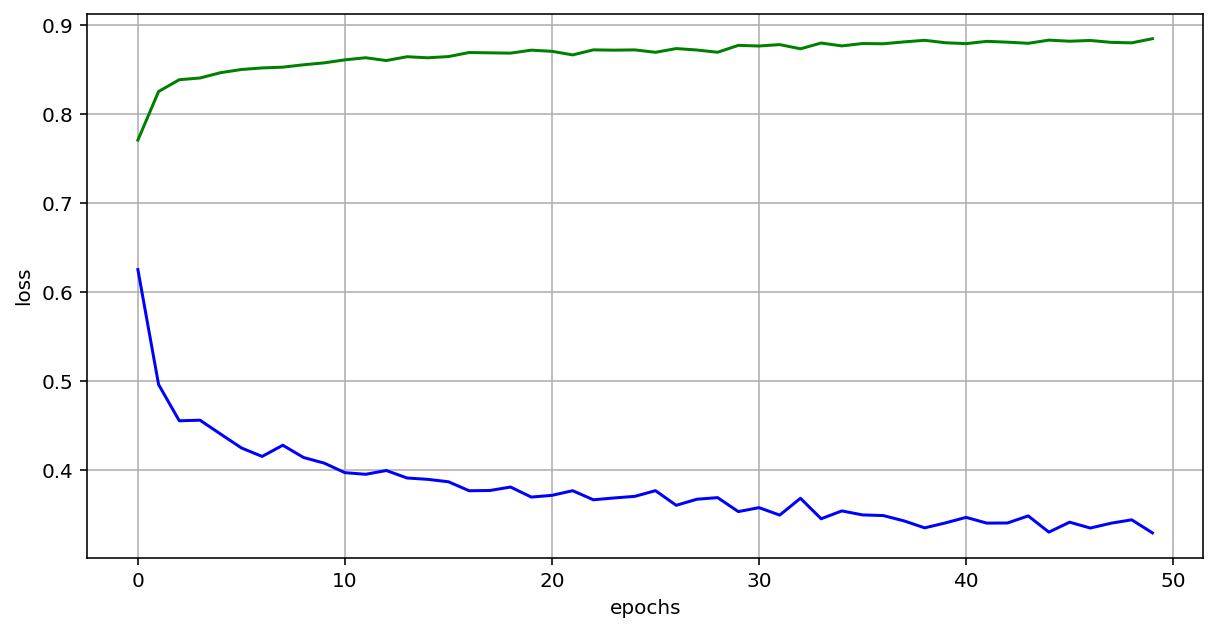

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(history.history["loss"], c = 'b')
plt.plot(history.history['accuracy'], c = 'g')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid(True)
plt.show()

Our model actually performs slightly worse the second time around

In [57]:
# Let's revert to our initial model and make some changes to the activations

model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(128, activation = 'relu', kernel_initializer = he_normal()),
    Dense(64, activation = 'relu', kernel_initializer = he_normal()),
    Dense(10) # Fully connected output layer
])

In [58]:
learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])